In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# this notebook will be modified by me (Harshit Pathak) for the purpose 
# of my project, the original notebook is available at:
# https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb

# CIFAR10 (CNN)

In [3]:
import tensorflow as tf

from keras import datasets, models, layers
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## No dataset dimensionality reduction algorithm

In [5]:
# train_images, train_labels, test_images, test_labels are ndarrays

print(len(train_images))
print(len(train_labels))

print(len(test_images))
print(len(test_labels))

50000
50000
10000
10000


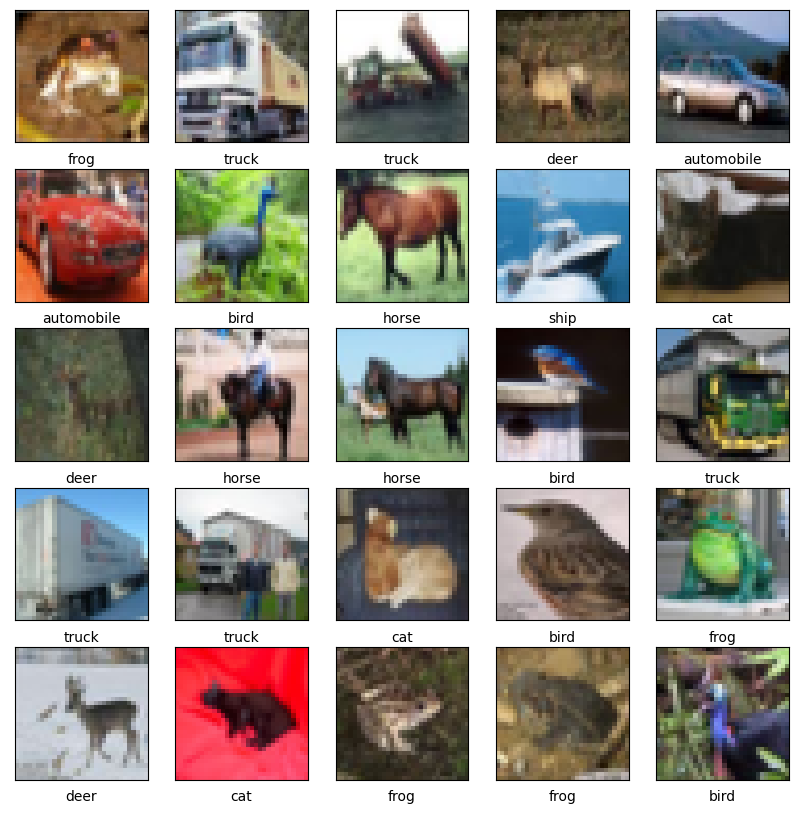

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 40s 24ms/step - loss: 1.5041 - accuracy: 0.4504 - val_loss: 1.2292 - val_accuracy: 0.5575
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1395 - accuracy: 0.5944 - val_loss: 1.0632 - val_accuracy: 0.6222
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9906 - accuracy: 0.6526 - val_loss: 0.9778 - val_accuracy: 0.6499
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8912 - accuracy: 0.6872 - val_loss: 0.9009 - val_accuracy: 0.6906
Epoch 5/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8162 - accuracy: 0.7144 - val_loss: 0.8609 - val_accuracy: 0.6995
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7584 - accuracy: 0.7344 - val_loss: 0.8376 - val_accuracy: 0.7142
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7081 - accuracy: 0.7508 - val_loss: 0.8511 -

313/313 - 2s - loss: 0.8698 - accuracy: 0.7135 - 2s/epoch - 5ms/step


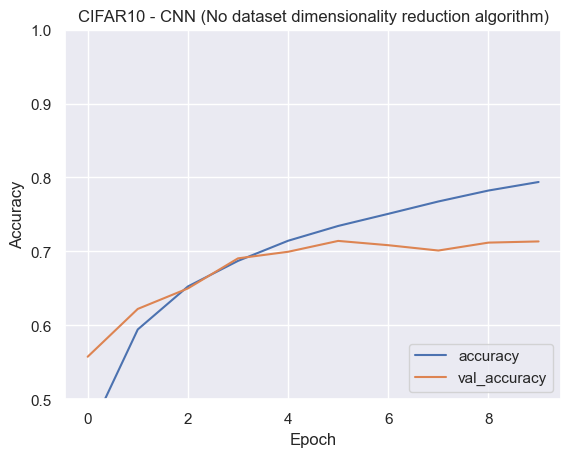

In [12]:
import seaborn as sns

sns.set_theme()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("CIFAR10 - CNN (No dataset dimensionality reduction algorithm)")

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [13]:
print(test_acc)

0.7135000228881836


## t-SNE

In [14]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, learning_rate='auto', verbose=1, init='random', perplexity=20)

combined_images = np.concatenate((train_images, test_images))

# need to reshape as the TSNE.fit_transform() method can only
# take 2-dimensional numpy arrays
nsamples, nx, ny, nz = combined_images.shape
combined_images = combined_images.reshape((nsamples, nx*ny*nz))

combined_tsne = tsne.fit_transform(combined_images)

train_tsne = combined_tsne[:50000]

test_tsne = combined_tsne[-10000:]

print(len(train_tsne))
print(len(test_tsne))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.236s...
[t-SNE] Computed neighbors for 60000 samples in 342.237s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

In [21]:
train_tsne = train_tsne.reshape(train_tsne.shape[0], train_tsne.shape[1], 1)
test_tsne = test_tsne.reshape(test_tsne.shape[0], test_tsne.shape[1], 1)

print(train_tsne.shape)
print(test_tsne.shape)

(50000, 2, 1)
(10000, 2, 1)


In [22]:
n_timesteps = train_tsne.shape[1]
n_features = train_tsne.shape[2]

model_tsne = models.Sequential()
model_tsne.add(layers.Input(shape=(n_timesteps, n_features)))
model_tsne.add(layers.Conv1D(filters=64, kernel_size=1, activation='relu'))
model.add(layers.Dropout(0.5))
model_tsne.add(layers.Conv1D(filters=32, kernel_size=1, activation='relu'))
model_tsne.add(layers.Conv1D(filters=16, kernel_size=1, activation='relu'))
model_tsne.add(layers.MaxPooling1D(pool_size=2))

model_tsne.add(layers.Flatten())
model_tsne.add(layers.Dense(32, activation='relu'))
model_tsne.add(layers.Dense(n_features))

In [29]:
model_tsne.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mae'])

history = model_tsne.fit(train_tsne, train_labels, epochs=10, 
                    validation_data=(test_tsne, test_labels))

Epoch 1/10
1563/1563 [==============================] - 5s 2ms/step - loss: 9.0933 - mae: 2.5883 - val_loss: 8.5568 - val_mae: 2.5212
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 8.3235 - mae: 2.4960 - val_loss: 8.2126 - val_mae: 2.4868
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 8.2565 - mae: 2.4900 - val_loss: 8.2305 - val_mae: 2.4932
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 8.2326 - mae: 2.4878 - val_loss: 8.2168 - val_mae: 2.4829
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 8.1947 - mae: 2.4802 - val_loss: 8.1945 - val_mae: 2.4782
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 8.1839 - mae: 2.4798 - val_loss: 8.1401 - val_mae: 2.4675
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 8.1623 - mae: 2.4738 - val_loss: 8.1124 - val_mae: 2.4637
Epoch 8/10
1563/1563 [==============================] - 4s 2ms

313/313 - 0s - loss: 8.0773 - mae: 2.4569 - 404ms/epoch - 1ms/step


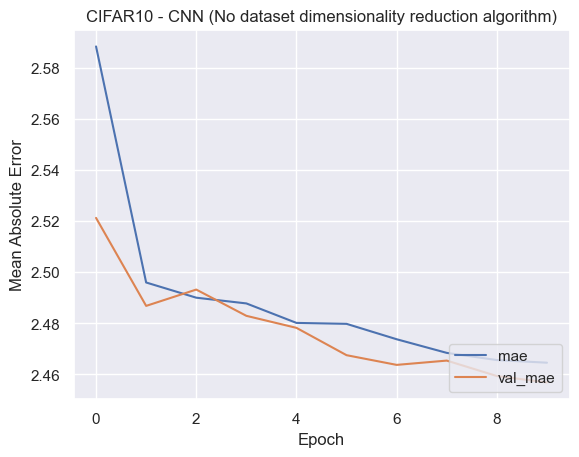

In [34]:
import seaborn as sns

sns.set_theme()

plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='lower right')
plt.title("CIFAR10 - CNN (No dataset dimensionality reduction algorithm)")

loss, mae = model_tsne.evaluate(test_tsne,  test_labels, verbose=2)

In [36]:
print(mae)

2.456862688064575
